In [73]:
import numpy as np
import scipy.stats
from sklearn.metrics import pairwise_distances

In [74]:
# Returns randomly selected indices. It will return the specified number of indices for each class.
def sample_indices(labels, *num_per_class):
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

In [75]:
# Getting training data array and eliminating header titles
data = np.genfromtxt('fashion-mnist.csv', delimiter=',', dtype=int)
data = data[1:,:]

# Separating features from the labels
labels = data[:,0]
data = data[:,1:]

In [76]:
# K-NN Classifier
def knn_classifier(testing_data, training_data, training_labels, k = 41):

    # Get distance matrix between testing and training samples
    distance_matrix = pairwise_distances(testing_data, training_data)

    # Find K nearest neighbours
    nearest_neighbours = np.argsort(distance_matrix)[:,:k]

    # Get labels for each nearest argument
    nearest_labels = training_labels[nearest_neighbours]

    # Return the mode (most common neighbour) for each sample
    return np.squeeze(scipy.stats.mode(nearest_labels, axis = 1).mode)

In [77]:
# Creating both arrays for storing the results for each k.
testing_error_mean = []
testing_error_stdev = []
training_error_mean = []
training_error_stdev = []

# Varying the number of nearest neighbours used from k = 1 to k = 10.
for k in range(1, 10):
    
    # List for all the success accuracy for each time.
    testing_error_list = []
    training_error_list = []

    for i in range(5):
    
        # Getting the training samples and the test samples by getting their indices first.
        all_indices = np.arange(len(labels))
        training_indices = sample_indices(labels, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250)
        training_data = data[training_indices]
        training_labels = labels[training_indices]
        test_indices = np.setdiff1d(all_indices, training_indices)
        testing_data = data[test_indices]
    
        # Using classifier. 
        test_classifier = knn_classifier(testing_data, training_data, training_labels, k = k)
        training_classifier = knn_classifier(training_data, training_data, training_labels, k = k)
    
        # Calculating classifier error accuracy and appending it to the list.
        testing_error_list.append(np.ma.count(np.where(test_classifier == labels[test_indices])) / 2500)
        training_error_list.append(np.ma.count(np.where(training_classifier == labels[training_indices])) / 7500)

    # Calculating mean and standard deviation from the array of accuracies obtained.
    testing_error_array = np.array(testing_error_list)
    testing_error_mean.append(np.mean(testing_error_array))
    testing_error_stdev.append(np.std(testing_error_array))
    training_error_array = np.array(training_error_list)
    training_error_mean.append(np.mean(training_error_array))
    training_error_stdev.append(np.std(training_error_array))

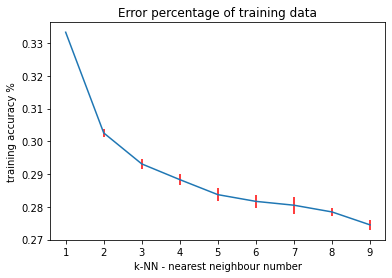

In [79]:
import math
from matplotlib import pyplot as plt

k = np.arange(1, 10)
plt.errorbar(k, training_error_mean, yerr = training_error_stdev, ecolor = 'red')
plt.xlabel('k-NN - nearest neighbour number')
plt.ylabel('training accuracy %')
plt.title('Error percentage of training data')
plt.show()

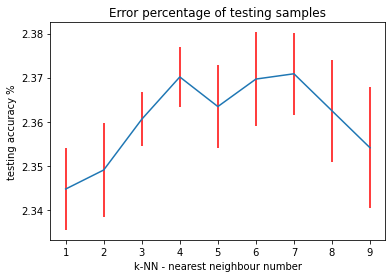

In [80]:
k = np.arange(1, 10)
plt.errorbar(k, testing_error_mean, yerr = testing_error_stdev, ecolor = 'red')
plt.xlabel('k-NN - nearest neighbour number')
plt.ylabel('testing accuracy %')
plt.title('Error percentage of testing samples')
plt.show()

In [81]:
# Sampling indices for testing (25%)
testing_indices = sample_indices(labels, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250)

# Separating training and testing data
testing_data = data[testing_indices]
testing_labels = labels[testing_indices]

all_indices = np.arange(len(labels))
training_indices = np.setdiff1d(all_indices, testing_indices)
training_data = data[training_indices]
training_labels = labels[training_indices]

In [82]:
# Classification and confusion matrix.
first_classification = knn_classifier(testing_data, training_data, training_labels, k = 5)

classified_class_1 = np.squeeze(np.where(first_classification == 0))
classified_class_2 = np.squeeze(np.where(first_classification == 1))
classified_class_3 = np.squeeze(np.where(first_classification == 2))
classified_class_4 = np.squeeze(np.where(first_classification == 3))

actual_class_1 = np.squeeze(np.where(testing_labels == 0))
actual_class_2 = np.squeeze(np.where(testing_labels == 1))
actual_class_3 = np.squeeze(np.where(testing_labels == 2))
actual_class_4 = np.squeeze(np.where(testing_labels == 3))


row_1 = np.array([np.ma.count(np.intersect1d(classified_class_1, actual_class_1)), np.ma.count(np.intersect1d(classified_class_2, actual_class_1)), np.ma.count(np.intersect1d(classified_class_3, actual_class_1)), np.ma.count(np.intersect1d(classified_class_4, actual_class_1))])
row_2 = np.array([np.ma.count(np.intersect1d(classified_class_1, actual_class_2)), np.ma.count(np.intersect1d(classified_class_2, actual_class_2)), np.ma.count(np.intersect1d(classified_class_3, actual_class_2)), np.ma.count(np.intersect1d(classified_class_4, actual_class_2))])
row_3 = np.array([np.ma.count(np.intersect1d(classified_class_1, actual_class_3)), np.ma.count(np.intersect1d(classified_class_2, actual_class_3)), np.ma.count(np.intersect1d(classified_class_3, actual_class_3)), np.ma.count(np.intersect1d(classified_class_4, actual_class_3))])
row_4 = np.array([np.ma.count(np.intersect1d(classified_class_1, actual_class_4)), np.ma.count(np.intersect1d(classified_class_2, actual_class_4)), np.ma.count(np.intersect1d(classified_class_3, actual_class_4)), np.ma.count(np.intersect1d(classified_class_4, actual_class_4))])

confusion_matrix_1 = np.array([row_1, row_2, row_3, row_4])
print(confusion_matrix_1)

[[219   0   9   3]
 [  3 236   2   8]
 [  7   0 192   1]
 [ 19   3   7 206]]
